# 常微分方程 Ordinary Differential Equation
*例子来自《python数学建模算法与应用》*

## 洛伦兹模型
$$
\begin{cases} \dot{x} = \sigma(y - x) \\
              \dot{y} =  \rho x - y -xz \\ 
              \dot{z} = xy - \beta z \end{cases}
$$

In [2]:
from rich import print
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from enum import IntEnum
# from enum import Enum  #

使用odeint需将高阶方程转成一阶微分方程组的形式，这里已经有了这种形式。
[scipy.integrate.odeint](../package_introduction/scipy/integrate/odeint.ipynb)

In [3]:
class Var(IntEnum):  # 具有隐式转换成int的IntEnum，实际工程中不要乱用
    x = 0
    y = 1
    z = 2

sigma, rho, beta = 10, 28, 8/3
g = lambda vars, t: [sigma * (vars[Var.y] - vars[Var.x]),
                    rho * vars[Var.x] - vars[Var.y] - vars[Var.x] * vars[Var.z],
                    vars[Var.x] * vars[Var.y] - beta * vars[Var.z]]  # 照着写
s01 = np.random.rand(3)  # 生成三个随机初始值
t0 = np.linspace(0, 50, 5000)

In [4]:
s1: np.ndarray = odeint(g, s01, t0)  # 方程组，初始值array，自变量取值
print(s1.shape)  # 5000 * 3 的矩阵 分别为 x,y,z在给定区间上的数值解

(5000, 3)

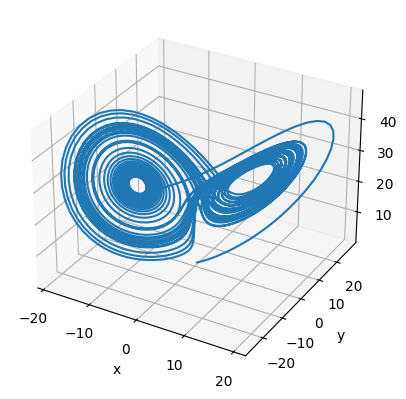

In [6]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_xlabel('x'), ax.set_ylabel('y')  #, ax.set_label('z')  # 怎么set_zlable呢？
plt.plot(s1[:, Var.x], s1[:, Var.y], s1[:, Var.z])
plt.show()  # 轨线

轨线表示了点(三维向量)在三维坐标下的运动，在这幅图中最后趋于稳定。***虽然没画出运动方向***

当然，上图还有许多不尽人意之处，比如：
- 没画出位置随时间的变化
- 两个圆圈是怎么回事，书上说是蝴蝶效应的体现，但说得很不清楚

***待解决***